In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def orbPhase(HJD,Epoch,period):
    #returns the period of an object using the Julian date, the Epoch of minimum 1, and the orbital period
    numerator = (HJD - (2.4E6) - Epoch) % period 
    ans = (numerator)/period
    
    return ans

In [4]:
#import the data
df = pd.read_csv('~/school_programs/AST401L_BXPeg/magnitudeData/bxpeg.dat', delim_whitespace=True)#import the data as a dataframe
#label each column
df.columns = ['frameName', 'objectNum', 'JD', 'col', 'line', 'BVR', 'mag', 'err']
#sort the dataframe by julian date
df = df.sort_values(by = ['JD'])
print(df)

              frameName  objectNum            JD      col     line BVR  \
0     20231005_0076.fit          2  2.460223e+06  684.494  871.838   B   
1     20231005_0076.fit          3  2.460223e+06  621.473  163.526   B   
2     20231005_0077.fit          1  2.460223e+06  179.579  434.424   V   
3     20231005_0077.fit          2  2.460223e+06  685.206  871.150   V   
4     20231005_0077.fit          3  2.460223e+06  621.723  163.137   V   
...                 ...        ...           ...      ...      ...  ..   
4340  20231005_1628.fit          1  2.460223e+06  731.185  616.218   V   
4342  20231005_1628.fit          3  2.460223e+06  291.290  890.197   V   
4344  20231005_1629.fit          2  2.460223e+06  216.709  181.621   R   
4343  20231005_1629.fit          1  2.460223e+06  724.447  615.861   R   
4345  20231005_1629.fit          3  2.460223e+06  284.569  889.385   R   

         mag    err  
0     -9.149  0.003  
1     -8.341  0.005  
2    -10.246  0.003  
3     -9.844  0.004  
4

In [5]:
cols = ['objectNum','JD','BVR','mag','err']
#extract data from the cols columns and turn into a 2D np array
temp = df[cols].to_numpy()

#get data just from object 1, which should be BXPeg. any position that isn't from BXPeg gets assigned a zero that we will filter out next
bxpegMagsB = np.where((df.objectNum==1)&(df.BVR=='B'),df.mag,0)
bxpegMagsV = np.where((df.objectNum==1)&(df.BVR=='V'),df.mag,0)
bxpegMagsR = np.where((df.objectNum==1)&(df.BVR=='R'),df.mag,0)

#do the same for objects 2 and 3
twoMagsB = np.where((df.objectNum==2)&(df.BVR=='B'),df.mag,0)
twoMagsV = np.where((df.objectNum==2)&(df.BVR=='V'),df.mag,0)
twoMagsR = np.where((df.objectNum==2)&(df.BVR=='R'),df.mag,0)

threeMagsB = np.where((df.objectNum==3)&(df.BVR=='B'),df.mag,0)
threeMagsV = np.where((df.objectNum==3)&(df.BVR=='V'),df.mag,0)
threeMagsR = np.where((df.objectNum==3)&(df.BVR=='R'),df.mag,0)

#now get error data from the same rows
#object 1
bxpegErrB = np.where((df.objectNum==1)&(df.BVR=='B'),df.err,0)
bxpegErrV = np.where((df.objectNum==1)&(df.BVR=='V'),df.err,0)
bxpegErrR = np.where((df.objectNum==1)&(df.BVR=='R'),df.err,0)

#object 2
twoErrB = np.where((df.objectNum==2)&(df.BVR=='B'),df.err,0)
twoErrV = np.where((df.objectNum==2)&(df.BVR=='V'),df.err,0)
twoErrR = np.where((df.objectNum==2)&(df.BVR=='R'),df.err,0)

#object 3
threeErrB = np.where((df.objectNum==3)&(df.BVR=='B'),df.err,0)
threeErrV = np.where((df.objectNum==3)&(df.BVR=='V'),df.err,0)
threeErrR = np.where((df.objectNum==3)&(df.BVR=='R'),df.err,0)
####################################################################################
#extract JD values:
HJDB = np.where((df.objectNum==1)&(df.BVR=='B'),df.JD,0)
HJDV = np.where((df.objectNum==1)&(df.BVR=='V'),df.JD,0)
HJDR = np.where((df.objectNum==1)&(df.BVR=='R'),df.JD,0)

In [6]:
#extract non-zero elements and reassign the mags arrays with those non zero values
bxpegMagsB = bxpegMagsB[bxpegMagsB != 0]
bxpegMagsV = bxpegMagsV[bxpegMagsV != 0]
bxpegMagsR = bxpegMagsR[bxpegMagsR != 0]

twoMagsB = twoMagsB[twoMagsB != 0]
twoMagsV = twoMagsV[twoMagsV != 0]
twoMagsR = twoMagsR[twoMagsR != 0]

threeMagsB = threeMagsB[threeMagsB != 0]
threeMagsV = threeMagsV[threeMagsV != 0]
threeMagsR = threeMagsR[threeMagsR != 0]

#do the same for the error values
bxpegErrB = bxpegErrB[bxpegErrB != 0]
bxpegErrV = bxpegErrV[bxpegErrV != 0]
bxpegErrR = bxpegErrR[bxpegErrR != 0]

twoErrB = twoErrB[twoErrB != 0]
twoErrV = twoErrV[twoErrV != 0]
twoErrR = twoErrR[twoErrR != 0]

threeErrB = threeErrB[threeErrB != 0]
threeErrV = threeErrV[threeErrV != 0]
threeErrR = threeErrR[threeErrR != 0]

#and for the HJDB 
HJDB = HJDB[HJDB != 0]
HJDV = HJDV[HJDV != 0]
HJDR = HJDR[HJDR != 0]

In [7]:
#need to fix the indexing issue that will be caused by twoMags and threeMags by popping the last data point in each one
#check beforehand; problem arrays are = twoMagsB, andvthreeMags B. all others are the same size as their corresponding bxpeg arrays
length = np.size(twoMagsB)
last_index = length - 1
twoMagsB = np.delete(twoMagsB, last_index)
threeMagsB = np.delete(threeMagsB, last_index)
twoErrB = np.delete(twoErrB, last_index)
threeErrB = np.delete(threeErrB, last_index)

In [8]:
#calculating phase array for plotting: 
phaseB = orbPhase(HJDB,44195.3771,0.2804208)
phaseV = orbPhase(HJDV,44195.3771,0.2804208)
phaseR = orbPhase(HJDR,44195.3771,0.2804208)

In [9]:
#for each filter, create magnitude differences btwn the two comparrison stars and bxpeg and btwn themselves
#B filter
diff21B = twoMagsB - bxpegMagsB
diff31B = threeMagsB - bxpegMagsB
diff32B = threeMagsB - twoMagsB

#V filter
diff21V = twoMagsV - bxpegMagsV
diff31V = threeMagsV - bxpegMagsV
diff32V = threeMagsV - twoMagsV

#R filter
diff21R = twoMagsR - bxpegMagsR
diff31R = threeMagsR - bxpegMagsR
diff32R = threeMagsR - twoMagsR

In [10]:
#calc standard error for error bars; 
#check to make sure you're using the correct error, might need to use whatever IRAF returned after doing phot
std_errorB = np.sqrt((bxpegErrB**2)+(threeErrB**2))
std_errorV = np.sqrt((bxpegErrV**2)+(threeErrV**2))
std_errorR = np.sqrt((bxpegErrR**2)+(threeErrR**2))

std_errorRefB = np.sqrt((twoErrB**2)+(threeErrB**2))
std_errorRefV = np.sqrt((twoErrV**2)+(threeErrV**2))
std_errorRefR = np.sqrt((twoErrR**2)+(threeErrR**2))

Time to plot. first lets plot the diffs vs the Julian date (JD, or HJD)

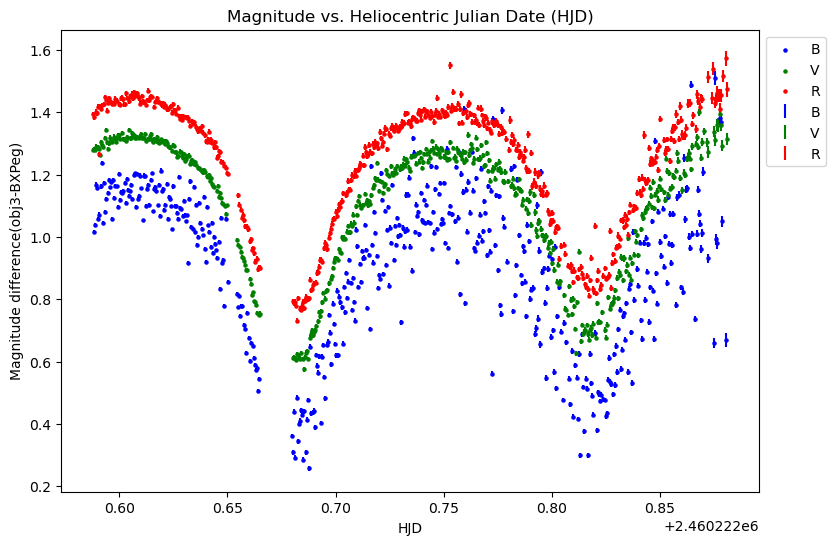

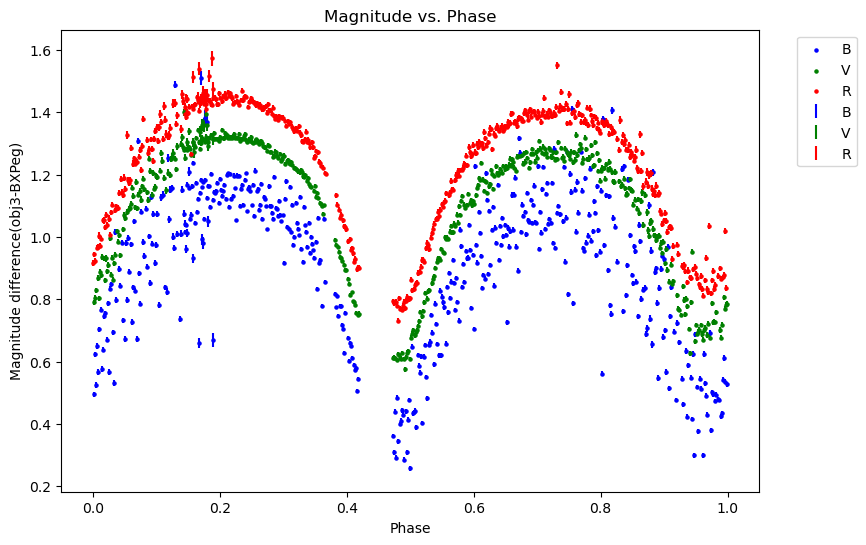

In [15]:
#plot the diffs vs. the JD
plt.errorbar(HJDB,diff31B,label = 'B',ls="none",color='b',zorder=1,yerr=std_errorB)
plt.errorbar(HJDV,diff31V,label = 'V',ls="none",color='g',zorder=1,yerr=std_errorV)
plt.errorbar(HJDR,diff31R,label = 'R',ls="none",color='r',zorder=1,yerr=std_errorR)

plt.scatter(HJDB,diff31B,label = 'B',s=5,color='b')
plt.scatter(HJDV,diff31V,label = 'V',s=5,color='g')
plt.scatter(HJDR,diff31R,label = 'R',s=5,color='r')

plt.legend(bbox_to_anchor=(1,1))
plt.title('Magnitude vs. Heliocentric Julian Date (HJD)')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('HJD')
plt.figure(1).set_figwidth(9)
plt.figure(1).set_figheight(6)
plt.show()

##############################################
plt.figure(2)
#plot of mags vs. phase 
plt.errorbar(phaseB,diff31B,label = 'B',ls="none",zorder=1,color='b',yerr=std_errorB)
plt.errorbar(phaseV,diff31V,label = 'V',ls="none",zorder=1,color='g',yerr=std_errorV)
plt.errorbar(phaseR,diff31R,label = 'R',ls="none",zorder=1,color='r',yerr=std_errorR)

plt.scatter(phaseB,diff31B,label = 'B',s=5,color='b')
plt.scatter(phaseV,diff31V,label = 'V',s=5,color='g')
plt.scatter(phaseR,diff31R,label = 'R',s=5,color='r')

plt.legend(bbox_to_anchor=(1.15,1))
plt.title('Magnitude vs. Phase')
plt.ylabel('Magnitude difference(obj3-BXPeg)')
plt.xlabel('Phase')
plt.figure(2).set_figwidth(9)
plt.figure(2).set_figheight(6)
plt.show()

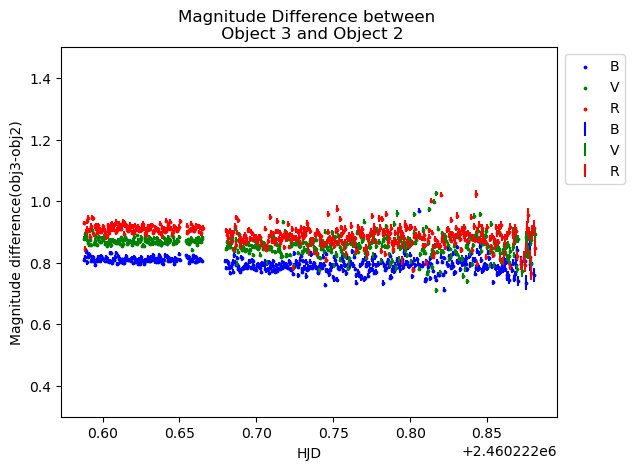

In [12]:
plt.errorbar(HJDB,diff32B,label='B',ls="none",color='b',yerr=std_errorRefB)
plt.errorbar(HJDV,diff32V,label='V',ls="none",color='g',yerr=std_errorRefV)
plt.errorbar(HJDR,diff32R,label='R',ls="none",color='r',yerr=std_errorRefR)

plt.scatter(HJDB,diff32B,label='B',color='b',s=3)
plt.scatter(HJDV,diff32V,label='V',color='g',s=3)
plt.scatter(HJDR,diff32R,label='R',color='r',s=3)

plt.legend(bbox_to_anchor=(1.15,1))
plt.xlabel('HJD')
plt.ylabel('Magnitude difference(obj3-obj2)')
plt.ylim(bottom=0.3, top=1.5)
plt.title('Magnitude Difference between \n Object 3 and Object 2')
plt.show()

how it should look:
https://ui.adsabs.harvard.edu/abs/1982AcA....32..131H/abstract